In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/symptom2disease/Symptom2Disease.csv


In [24]:
symptom_df = pd.read_csv('../input/symptom2disease/Symptom2Disease.csv')
symptom_df['label'] = symptom_df['label'].apply(str.title)
symptom_df.head(10)

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
5,5,Psoriasis,The skin on my palms and soles is thickened an...
6,6,Psoriasis,"The skin around my mouth, nose, and eyes is re..."
7,7,Psoriasis,My skin is very sensitive and reacts easily to...
8,8,Psoriasis,I have noticed a sudden peeling of skin at dif...
9,9,Psoriasis,The skin on my genitals is red and inflamed. I...


In [25]:
symptom_df = symptom_df.drop('Unnamed: 0', axis=1)
symptom_df

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,Diabetes,I'm shaking and trembling all over. I've lost ...
1196,Diabetes,"Particularly in the crevices of my skin, I hav..."
1197,Diabetes,I regularly experience these intense urges and...
1198,Diabetes,"I have trouble breathing, especially outside. ..."


# Exploratory Data Analysis

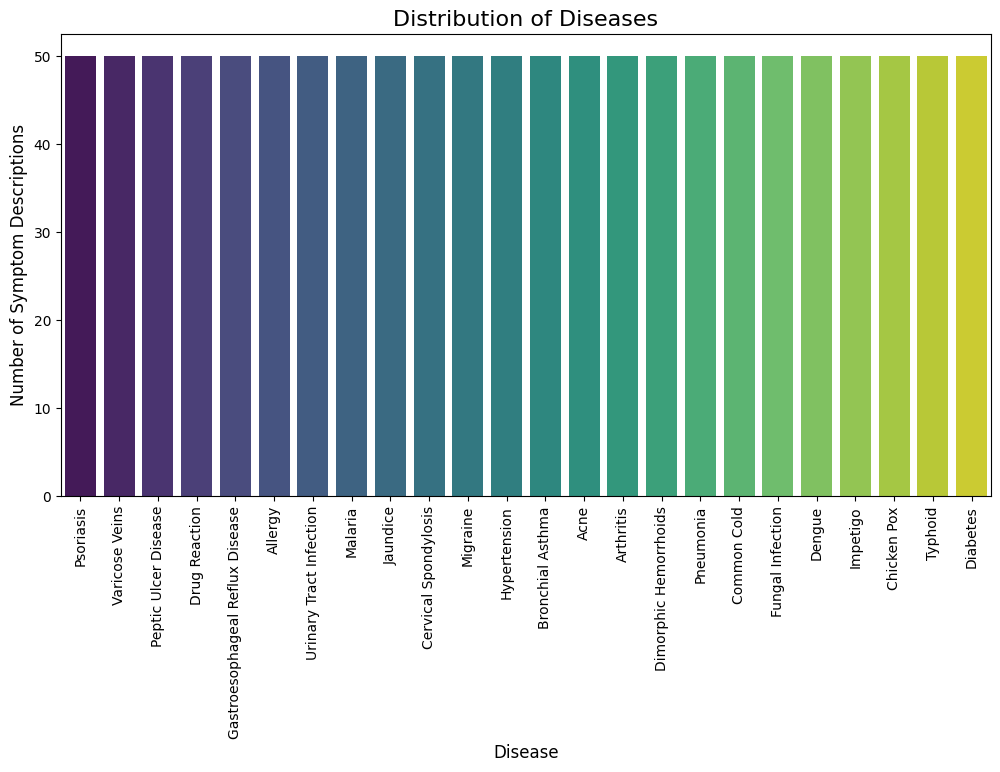

In [147]:
# Distribution Frequency of Diseases

disease_counts = symptom_df['label'].value_counts()

plt.figure(figsize=(12, 6))

sns.barplot(x=disease_counts.index, y=disease_counts.values, palette='viridis')

plt.title('Distribution of Diseases', fontsize=16)
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Number of Symptom Descriptions', fontsize=12)

plt.xticks(rotation=90)

plt.show()

Text for Psoriasis: I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches. My skin has been peeling, especially on my knees, elbows, ...


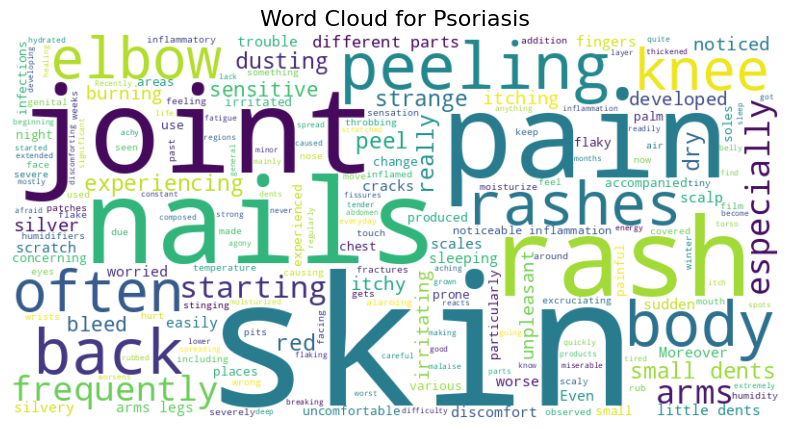

In [148]:
# Word Cloud of Different Diseases

disease = 'Psoriasis'
disease_text = " ".join(symptom_df[symptom_df['label'] == disease]['text'])

print(f"Text for {disease}: {disease_text[:200]}...")  # Print first 200 characters

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(disease_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for word cloud
plt.title(f'Word Cloud for {disease}', fontsize=16)
plt.show()

# Preprocessing

In [106]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords

from textblob import TextBlob

In [110]:
import nltk

!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [107]:
import string 

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to get the WordNet POS tag from NLTK POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Function to lemmatize a single text
def lemmatize_text(text):
    
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged_tokens]
    
    return " ".join(lemmatized_tokens)

# Function to remove common stopwords
def remove_stopwords(text):
    
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    return " ".join(filtered_words)

# Function to remove punctuations and make texts lowercase
def remove_punctuations_and_lowercase(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Function that encapsulates the other preprocessing techniques
def preprocessing(text):
    removed_stopwords = remove_stopwords(text)
    lemmatized = lemmatize_text(removed_stopwords)
    finalised_text = remove_punctuations_and_lowercase(lemmatized)
    
    return finalised_text

In [111]:
symptom_df_w2v = symptom_df.copy()
symptom_df_w2v['text'] = symptom_df['text'].apply(preprocessing)
symptom_df_w2v

,label,text
0,Psoriasis,experience skin rash arm leg torso past week...
1,Psoriasis,skin peeling especially knee elbow scalp p...
2,Psoriasis,experience joint pain finger wrist knee pai...
3,Psoriasis,silver like dust skin especially low back sca...
4,Psoriasis,nail small dent pit often feel inflammatory t...
...,...,...
1195,Diabetes,m shake trembling ve lose sense taste smell ...
1196,Diabetes,particularly crevice skin skin rash irritatio...
1197,Diabetes,regularly experience intense urge want urinate...
1198,Diabetes,trouble breathing especially outside start f...


# NLP Models Creation

**TF-IDF Vectorization with KNN Classification**

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

tfidf_vectorizer = TfidfVectorizer(max_features=1500)

X_train_text, X_test_text, y_train, y_test = train_test_split(symptom_df_w2v['text'],
                                                              symptom_df['label'],
                                                              stratify=symptom_df['label'],
                                                              test_size=0.3,
                                                              random_state=42)

X_train = tfidf_vectorizer.fit_transform(X_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)

In [122]:
# Cross Validation with Grid Search to Determine the Best Model Parameters

param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to test
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute the nearest neighbors
}

knn_classifier = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=4,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_knn_classifier = grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_b

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.9369047619047619


In [123]:
# Predict on test set
y_pred = best_knn_classifier.predict(X_test)

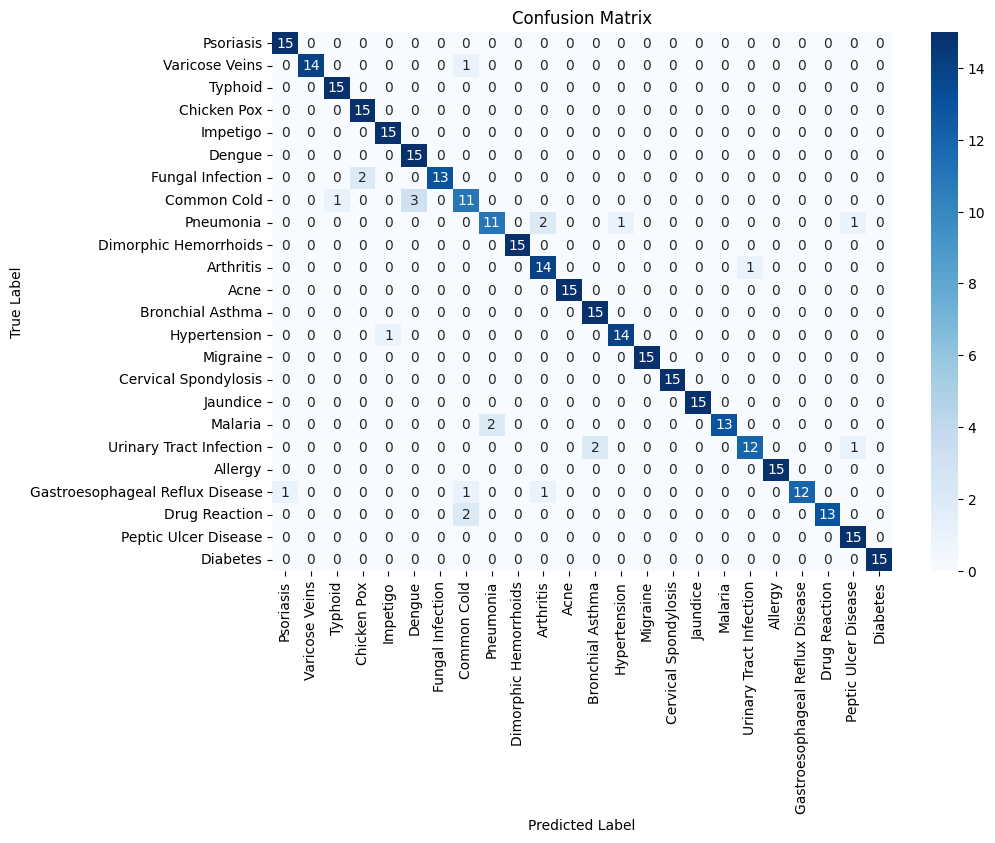

In [124]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=symptom_df['label'].unique(), 
            yticklabels=symptom_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [125]:
# Generate classification report
report = classification_report(y_test, y_pred, target_names=symptom_df['label'].unique())

# Print classification report
print("Classification Report:")
print(report)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

Classification Report:
                                 precision    recall  f1-score   support

                      Psoriasis       0.94      1.00      0.97        15
                 Varicose Veins       1.00      0.93      0.97        15
                        Typhoid       0.94      1.00      0.97        15
                    Chicken Pox       0.88      1.00      0.94        15
                       Impetigo       0.94      1.00      0.97        15
                         Dengue       0.83      1.00      0.91        15
               Fungal Infection       1.00      0.87      0.93        15
                    Common Cold       0.73      0.73      0.73        15
                      Pneumonia       0.85      0.73      0.79        15
          Dimorphic Hemorrhoids       1.00      1.00      1.00        15
                      Arthritis       0.82      0.93      0.87        15
                           Acne       1.00      1.00      1.00        15
               Bronchial As

In [180]:
symptom = "I have a lot of trouble breathing, my chest feels heavy and i cough mucus"
preprocessed_symptom = preprocessing(symptom)
symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptom])
predicted_disease = best_knn_classifier.predict(symptom_tfidf)
print(f'Predicted Disease: {predicted_disease[0]}')

Predicted Disease: Pneumonia


**BERT Model**

In [186]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import torch

In [187]:
# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [188]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(symptom_df['label'])

X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(symptom_df['text'], 
                                                       y_encoded, 
                                                       stratify=y_encoded, 
                                                       test_size=0.3, 
                                                       random_state=42)

train_encodings = tokenizer(list(X_train_bert), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test_bert), truncation=True, padding=True, max_length=128)

In [189]:
# Create a dataset class that will return the input encodings and labels in the format required by the Trainer class.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [190]:
train_dataset = CustomDataset(train_encodings, y_train_bert.tolist())
test_dataset = CustomDataset(test_encodings, y_test_bert.tolist())

In [191]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    return {
        'accuracy': accuracy,
    }

In [192]:
training_args = TrainingArguments(
    output_dir='/kaggle/working/results',
    num_train_epochs=10,
    learning_rate=4e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    logging_dir='/kaggle/working/logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    metric_for_best_model='accuracy',
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [193]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=24)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy
1,2.520100,2.283716,0.630556
2,1.474600,1.224241,0.841667
3,0.667000,0.593087,0.905556
4,0.284500,0.323411,0.955556
5,0.127500,0.188776,0.961111
6,0.064400,0.134607,0.972222
7,0.041100,0.121230,0.975000
8,0.036200,0.113709,0.975000
9,0.031800,0.110779,0.977778
10,0.029800,0.109246,0.980556


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

TrainOutput(global_step=530, training_loss=0.6239785859044993, metrics={'train_runtime': 137.5474, 'train_samples_per_second': 61.07, 'train_steps_per_second': 3.853, 'total_flos': 336766436697600.0, 'train_loss': 0.6239785859044993, 'epoch': 10.0})

In [194]:
trainer.evaluate()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 0.10924635827541351,
 'eval_accuracy': 0.9805555555555555,
 'eval_runtime': 1.6447,
 'eval_samples_per_second': 218.885,
 'eval_steps_per_second': 13.984,
 'epoch': 10.0}

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


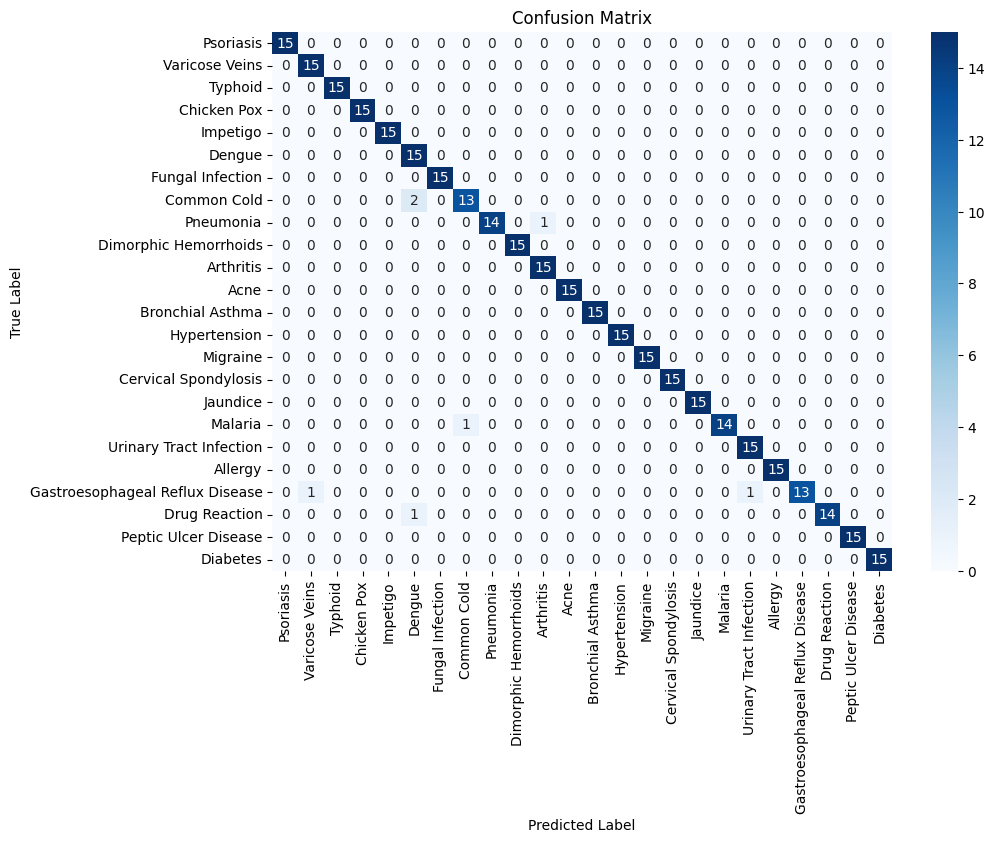

In [195]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get predictions
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_test_bert, pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=symptom_df['label'].unique(), 
            yticklabels=symptom_df['label'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [196]:
# Generate classification report
report = classification_report(y_test_bert, pred_labels, target_names=label_encoder.classes_)

# Print classification report
print("Classification Report:")
print(report)

# Calculate and print accuracy
accuracy = accuracy_score(y_test_bert, pred_labels)
print(f"Accuracy: {accuracy:.5f}")

Classification Report:
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        15
                        Allergy       0.94      1.00      0.97        15
                      Arthritis       1.00      1.00      1.00        15
               Bronchial Asthma       1.00      1.00      1.00        15
           Cervical Spondylosis       1.00      1.00      1.00        15
                    Chicken Pox       0.83      1.00      0.91        15
                    Common Cold       1.00      1.00      1.00        15
                         Dengue       0.93      0.87      0.90        15
                       Diabetes       1.00      0.93      0.97        15
          Dimorphic Hemorrhoids       1.00      1.00      1.00        15
                  Drug Reaction       0.94      1.00      0.97        15
               Fungal Infection       1.00      1.00      1.00        15
Gastroesophageal Reflux Dis

In [197]:
label_encoder.classes_

array(['Acne', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical Spondylosis', 'Chicken Pox', 'Common Cold', 'Dengue',
       'Diabetes', 'Dimorphic Hemorrhoids', 'Drug Reaction',
       'Fungal Infection', 'Gastroesophageal Reflux Disease',
       'Hypertension', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Peptic Ulcer Disease', 'Pneumonia', 'Psoriasis', 'Typhoid',
       'Urinary Tract Infection', 'Varicose Veins'], dtype=object)

In [200]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

class_names = label_encoder.classes_

inputs = tokenizer("I have a lot of trouble breathing, my chest feels heavy and i cough mucus", return_tensors="pt", truncation=True, padding=True, max_length=128)
inputs = {key: val.to(device) for key, val in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    pred_label_idx = torch.argmax(logits, dim=-1).item()
    
predicted_disease = class_names[pred_label_idx]

print(f'Predicted Disease: {predicted_disease}')

Predicted Disease: Pneumonia
